## 🔹 Этап 2. ML (на выбор)

### 🅰️ Кластеризация клиентов (KMeans)
- Сгруппируйте данные по клиентам:
  - Общая выручка.
  - Количество покупок.
  - Средний чек.
- Стандартизируйте данные (`StandardScaler`).
- Обучите `KMeans(n_clusters=3)` и добавьте колонку `Cluster`.
- Визуализируйте кластеры (`scatterplot` или `pairplot`).
- Охарактеризуйте каждый кластер (например, “Мелкие покупатели”, “Крупные B2B”, “Редкие клиенты”).

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score



In [41]:
df = pd.read_csv('/Users/nikolajantonevic/Desktop/25_Проектная работа на Python/GitHub/TMS_project_work/notebooks/_data_cleaned_.csv')
#pd.set_option('display.max_columns', None)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,IsReturn,Year,Month,Day,Weekday,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,0,2009,12,1,Tuesday,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,0,2009,12,1,Tuesday,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,0,2009,12,1,Tuesday,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,0,2009,12,1,Tuesday,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,0,2009,12,1,Tuesday,2009-12
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,12,0,2009,12,1,Tuesday,2009-12
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,0,2009,12,1,Tuesday,2009-12
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,12,0,2009,12,1,Tuesday,2009-12
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,12,0,2009,12,1,Tuesday,2009-12
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0,12,0,2009,12,1,Tuesday,2009-12


In [42]:
df_customers = (
    df.groupby('Customer ID', as_index=False)
    .agg(
        total_revenue=('TotalPrice', 'sum'),
        total_orders=('Invoice', 'nunique'),
        avg_check=('TotalPrice', 'mean')
    )
)

df_customers.head(10)

,Customer ID,total_revenue,total_orders,avg_check
0,12346.0,-51.74,17,-1.100851
1,12347.0,4921.53,8,22.169054
2,12348.0,2019.40,5,39.596078
3,12349.0,4404.54,5,24.469667
4,12350.0,334.40,1,19.670588
5,12351.0,300.93,1,14.330000
6,12352.0,1889.21,13,16.718673
7,12353.0,406.76,2,16.948333
8,12354.0,1079.40,1,18.610345
9,12355.0,947.61,2,27.074571


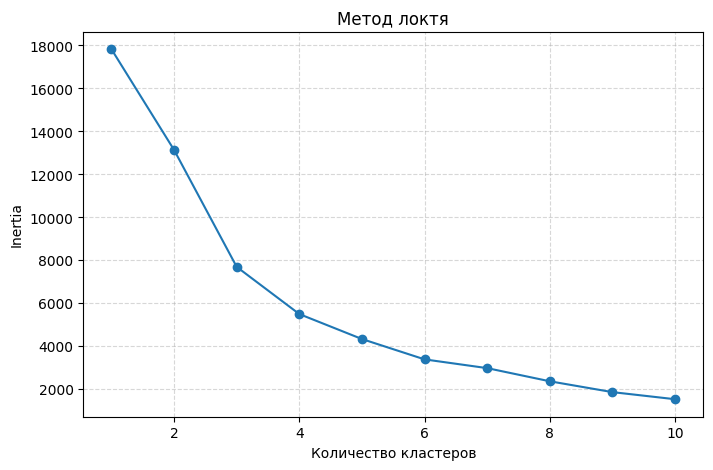

In [55]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### На графике видим, что перелом происходит на 3-х кластерах, значит принимаем количество кластеров: 3

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_customers[['total_revenue', 'total_orders', 'avg_check']])

kmeans = KMeans(n_clusters=3, random_state=42)
df_customers['Cluster'] = kmeans.fit_predict(X_scaled)

df_customers.head(10)



,Customer ID,total_revenue,total_orders,avg_check,Cluster
0,12346.0,-51.74,17,-1.100851,0
1,12347.0,4921.53,8,22.169054,0
2,12348.0,2019.40,5,39.596078,0
3,12349.0,4404.54,5,24.469667,0
4,12350.0,334.40,1,19.670588,0
5,12351.0,300.93,1,14.330000,0
6,12352.0,1889.21,13,16.718673,0
7,12353.0,406.76,2,16.948333,0
8,12354.0,1079.40,1,18.610345,0
9,12355.0,947.61,2,27.074571,0


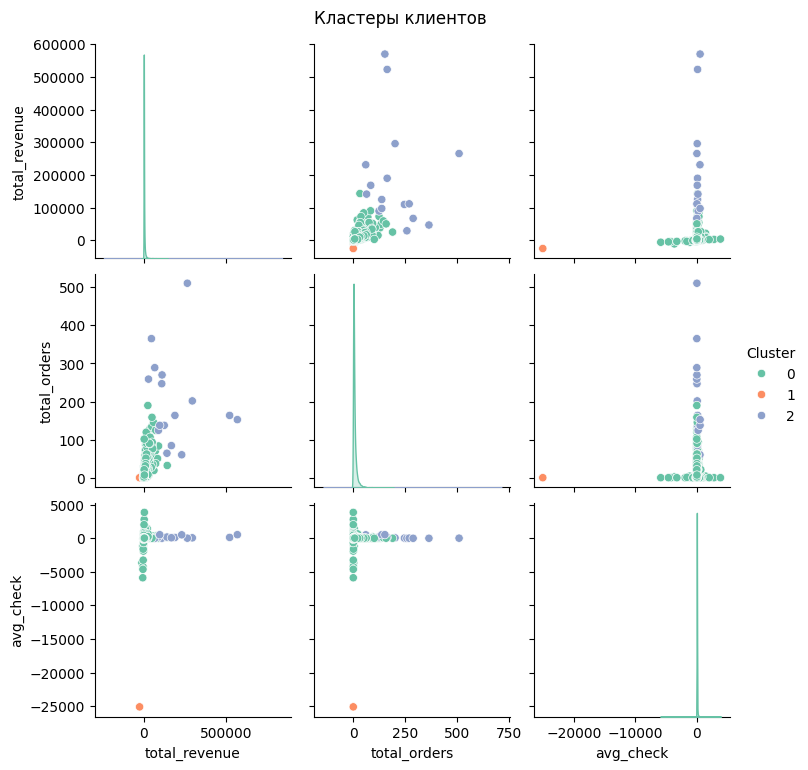

In [45]:
sns.pairplot(df_customers, 
            vars=['total_revenue', 'total_orders', 'avg_check'], 
            hue='Cluster', 
            palette='Set2', 
            diag_kind='kde')
plt.suptitle('Кластеры клиентов', y=1.02)
plt.show()

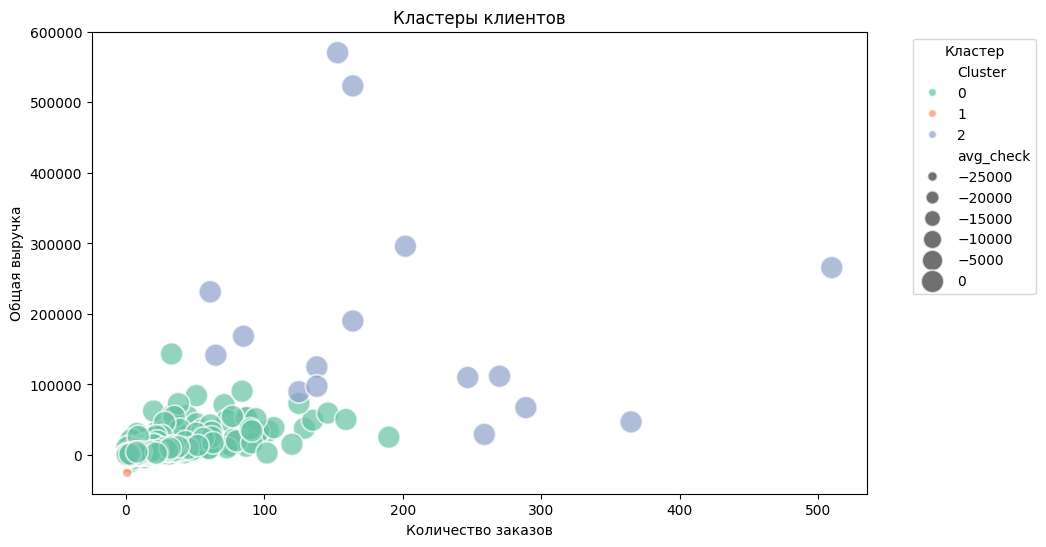

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_customers,
    x='total_orders',
    y='total_revenue',
    hue='Cluster',
    size='avg_check',
    palette='Set2',
    sizes=(50, 300),
    alpha=0.7
)
plt.title('Кластеры клиентов')
plt.xlabel('Количество заказов')
plt.ylabel('Общая выручка')
plt.legend(title='Кластер', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [54]:
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.964


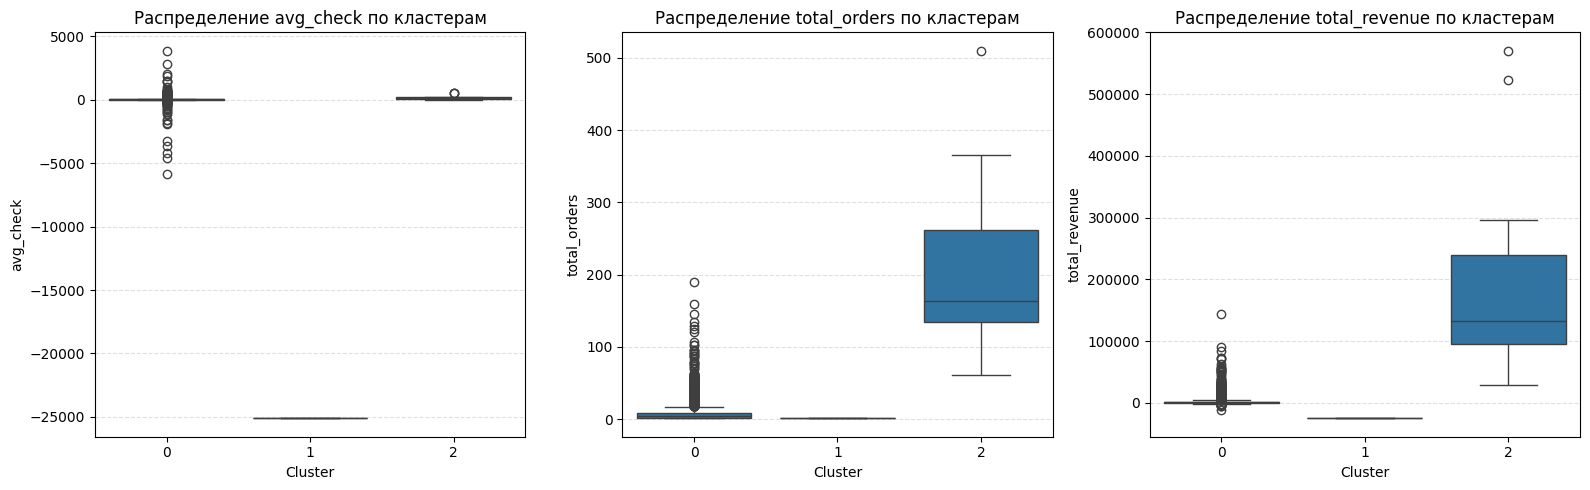

In [71]:
features_km = ["avg_check", "total_orders", "total_revenue"] 
plt.figure(figsize=(16, 5))
for i, col in enumerate(features_km):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_customers, x="Cluster", y=col)
    plt.title(f"Распределение {col} по кластерам")
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

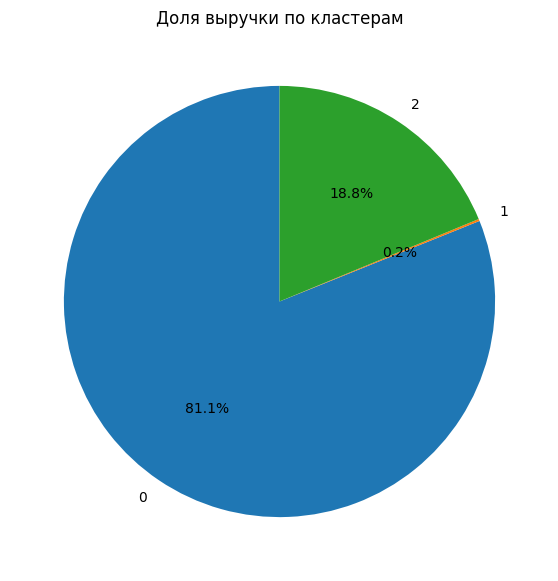

In [67]:
revenue_by_cluster = df_customers.groupby("Cluster")["total_revenue"].sum().abs()

plt.figure(figsize=(7,7))
plt.pie(
        revenue_by_cluster,
        labels=revenue_by_cluster.index,
        autopct="%1.1f%%",
        startangle=90
)
plt.title("Доля выручки по кластерам")
plt.show()

### 🅱️ Регрессия (LinearRegression)
- Цель: предсказать `TotalRevenue` клиента.
- Фичи: средний чек, количество покупок, количество возвратов, среднее количество товаров в заказе.
- Разделите данные на train/test (80/20).
- Обучите `LinearRegression`.
- Посчитайте `MAE`, `RMSE`, `R²`.
- Постройте график "фактические vs предсказанные значения".

In [72]:
df_customers['total_returns'] = df.groupby('Customer ID')['IsReturn'].sum().values
df_customers['avg_quantity_per_order'] = df.groupby('Customer ID')['Quantity'].mean().values

features = ['avg_check', 'total_orders', 'total_returns', 'avg_quantity_per_order']
target = 'total_revenue'

X = df_customers[features]
y = df_customers[target]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # вычисляем корень из MSE вручную
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2228.46
RMSE: 15432.54
R²: 0.27


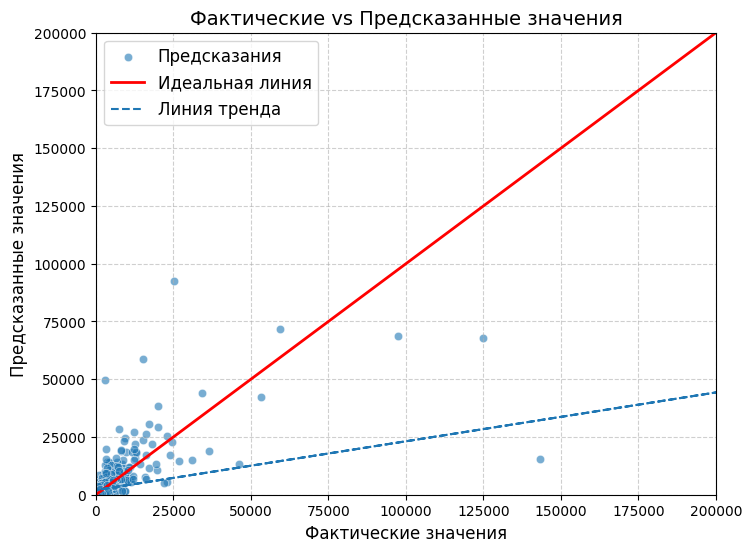

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальная линия')  # линия идеальных предсказаний
# Линия тренда
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), linestyle='--', label='Линия тренда')
plt.xlim(0, 200000)
plt.ylim(0, 200000)
plt.title('Фактические vs Предсказанные значения', fontsize=14)
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()